In [1]:
##import part
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
plt.style.use('seaborn')


# setting seeds
# random.seed(42)
# np.random.seed(42)

In [2]:
class mushroomEnv:
    # X is the feature, y is the reward.0 means eating
    def __init__(self,X,y):
        self.X=X
        self.y=y

        self.X = X
        self.y = y

    def eat_mushroom(self,mushroom_idx):

        reward=self.y.loc[mushroom_idx].copy()        
        # regret=
        return reward

    

In [3]:
K=100
df = pd.read_csv('interactive-intro-rl-master/data/mushroom.csv')
df = df.sample(frac=1.0)
X_raw = df.copy().drop('edible', axis=1)
y = df.copy()['edible'].astype('category').cat.codes

## change into separate class
X = pd.get_dummies(X_raw,  drop_first=True)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.01)


X_test=X_test1.to_numpy()
y_test=y_test1.to_numpy()
df


,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7560,e,x,f,g,f,n,f,w,b,w,...,s,w,w,p,w,t,p,w,n,g
4400,p,x,f,y,f,f,f,c,b,h,...,k,p,n,p,w,o,l,h,v,g
664,e,b,s,w,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,s,g
3556,p,x,y,y,f,f,f,c,b,p,...,k,n,n,p,w,o,l,h,y,d
698,p,x,s,n,t,p,f,c,n,p,...,s,w,w,p,w,o,p,n,v,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,p,x,s,e,f,s,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
891,e,f,y,y,t,l,f,c,b,p,...,y,w,w,p,w,o,p,k,y,g
649,e,f,f,w,t,l,f,w,n,p,...,s,w,w,p,w,o,p,u,v,d
6841,p,f,s,e,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,d


In [4]:
df.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7560,e,x,f,g,f,n,f,w,b,w,...,s,w,w,p,w,t,p,w,n,g
4400,p,x,f,y,f,f,f,c,b,h,...,k,p,n,p,w,o,l,h,v,g
664,e,b,s,w,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,s,g
3556,p,x,y,y,f,f,f,c,b,p,...,k,n,n,p,w,o,l,h,y,d
698,p,x,s,n,t,p,f,c,n,p,...,s,w,w,p,w,o,p,n,v,u


In [5]:
X=X.to_numpy()
y=y.to_numpy()
X_train=X_train1.to_numpy()
y_train=y_train1.to_numpy()
X_train[1,:].shape,X_train


((95,),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 1],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]], dtype=uint8))

# random policy

In [6]:
class random_policy():
    def __init__(self):
        pass
    def choose_arm(self):
        arm=np.random.choice(a=[0,1])
        return arm


In [7]:
policy=random_policy()
regret=0
regret_cum=0
random_policy_regret=[]
for i in range(len(X)):
    chosen_arm=policy.choose_arm()
    if chosen_arm==y[i]:
        ## right case:
        regret=0
    else:
        regret=20
    regret_cum+=regret
    random_policy_regret.append(regret_cum)

regret_cum 

82780

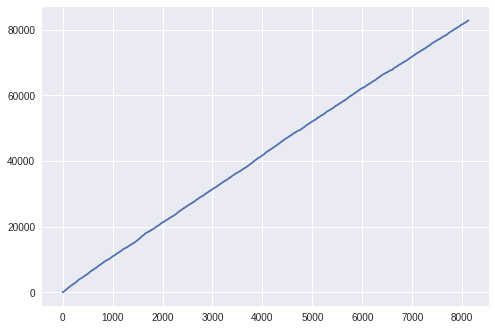

In [8]:
plt.plot(random_policy_regret)

# LinUCB


In [9]:
# Create class object for a single linear ucb disjoint arm
class linucb_disjoint_arm():
    
    def __init__(self, arm_index, d, alpha):
        
        # Track arm index
        self.arm_index = arm_index
        
        # Keep track of alpha
        self.alpha = alpha
        
        # A: (d x d) matrix = D_a.T * D_a + I_d. 
        # The inverse of A is used in ridge regression 
        self.A = np.identity(d)
        
        # b: (d x 1) corresponding response vector. 
        # Equals to D_a.T * c_a in ridge regression formulation
        self.b = np.zeros([d,1])
        
    def calc_UCB(self, x_array):
        # Find A inverse for ridge regression
        A_inv = np.linalg.inv(self.A)
        
        # Perform ridge regression to obtain estimate of covariate coefficients theta
        # theta is (d x 1) dimension vector
        self.theta = np.dot(A_inv, self.b)
        
        # Reshape covariates input into (d x 1) shape vector
        x = x_array.reshape([-1,1])
        
        # Find ucb based on p formulation (mean + std_dev) 
        # p is (1 x 1) dimension vector
        p = np.dot(self.theta.T,x) +  self.alpha * np.sqrt(np.dot(x.T, np.dot(A_inv,x)))
        
        return p
    
    def reward_update(self, reward, x_array):
        # Reshape covariates input into (d x 1) shape vector
        x = x_array.reshape([-1,1])
        
        
        # Update A which is (d * d) matrix.
        self.A += np.dot(x, x.T)
        
        # Update b which is (d x 1) vector
        # reward is scalar
        self.b += reward * x

In [10]:
class linucb_policy():
    
    def __init__(self, K_arms, d, alpha):
        self.K_arms = K_arms
        self.linucb_arms = [linucb_disjoint_arm(arm_index = i, d = d, alpha = alpha) for i in range(K_arms)]
        
    def select_arm(self, x_array):
        # Initiate ucb to be 0
        highest_ucb = -100
        
        # Track index of arms to be selected on if they have the max UCB.
        candidate_arms = []
        
        for arm_index in range(self.K_arms):
            # Calculate ucb based on each arm using current covariates at time t
            arm_ucb = self.linucb_arms[arm_index].calc_UCB(x_array)
            
            # If current arm is highest than current highest_ucb
            if arm_ucb > highest_ucb:
                
                # Set new max ucb
                highest_ucb = arm_ucb
                
                # Reset candidate_arms list with new entry based on current arm
                candidate_arms = [arm_index]

            # If there is a tie, append to candidate_arms
            if arm_ucb == highest_ucb:
                
                candidate_arms.append(arm_index)
        
        # Choose based on candidate_arms randomly (tie breaker)
        chosen_arm = np.random.choice(candidate_arms)
        
        return chosen_arm

In [11]:
def Simulator(K_arms, d, alpha, X,y):
    # Initiate policy
    linucb_policy_object = linucb_policy(K_arms = K_arms, d = d, alpha = alpha)
    
    # Instantiate trackers
    cumulative_rewards = 0
    deploy_reward=0
    learning_results = []
    deploy_results = []
    # just the counter
    counter1=0
    counter2=0

    regret=0
    regret_cum=0
    LinUCB_regret=[]

    # the result of deploying
    general_result = []
    # scores of deploy and learn highest is up to 10
    score1=[]
    score2=[]

    # list of wrong classification
    error_array=[]
    error=0
    
    i=0

    for i in tqdm(range(X.shape[0])):

        data_x_array=X[i]
        data_label = y[i]
        # Find policy's chosen arm based on input covariates at current time step
        arm_index = linucb_policy_object.select_arm(data_x_array)
        

        if arm_index==data_label:
        # reward of right
            reward=10
        else:
        # reward of wrong
            reward=-10
        regret=10-reward
        regret_cum+=regret
        LinUCB_regret.append(regret_cum)
        
        linucb_policy_object.linucb_arms[arm_index].reward_update(reward, data_x_array)

        # 50% data is used for learning and 50% deploying 
        # if np.random.random()<0.5:
        #     counter1 += 1
        #     cumulative_rewards += reward
        #     linucb_policy_object.linucb_arms[arm_index].reward_update(reward, data_x_array)
        #     learning_results.append(cumulative_rewards)
        #     score1.append(cumulative_rewards/counter1)
        # else:
        #     counter2 += 1
        #     deploy_reward += reward
        #     deploy_results.append(deploy_reward)
        #     general_result.append([data_label,arm_index])
        #     score2.append(deploy_reward/counter2)
        #     if arm_index!=data_label:
        #         error+=1
        #     error_array.append(error)
    return LinUCB_regret

In [12]:
epliso=0.1
alpha_input = 1+np.sqrt(np.log(2/epliso)/2)
LinUCB_regret = Simulator(K_arms = 2, d = 95, alpha = alpha_input,X=X,y=y)

100%|██████████| 8124/8124 [01:50<00:00, 73.29it/s] 


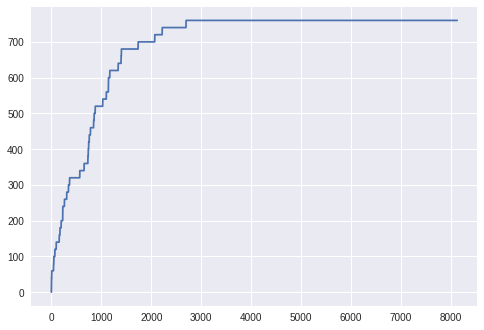

In [14]:
plt.plot(LinUCB_regret)

# Thompson Sampling

In [17]:
# Create class object for a single linear ucb disjoint arm
class linucb_disjoint_arm():
    
    def __init__(self, arm_index, d, alpha):
        
        # Track arm index
        self.arm_index = arm_index
        
        # Keep track of alpha
        self.alpha = alpha
        
        # A: (d x d) matrix = D_a.T * D_a + I_d. 
        # The inverse of A is used in ridge regression 
        self.A = np.identity(d)
        
        # b: (d x 1) corresponding response vector. 
        # Equals to D_a.T * c_a in ridge regression formulation
        self.b = np.zeros([d,1])
        
    def calc_UCB(self, x_array):
        # Find A inverse for ridge regression
        A_inv = np.linalg.inv(self.A)
        
        # Perform ridge regression to obtain estimate of covariate coefficients theta
        # theta is (d x 1) dimension vector
        self.theta = np.dot(A_inv, self.b)
        
        # Reshape covariates input into (d x 1) shape vector
        x = x_array.reshape([-1,1])
        
        # Find ucb based on p formulation (mean + std_dev) 
        # p is (1 x 1) dimension vector
        p = np.dot(self.theta.T,x)
        
        return p
    
    def reward_update(self, reward, x_array):
        # Reshape covariates input into (d x 1) shape vector
        x = x_array.reshape([-1,1])
        
        
        # Update A which is (d * d) matrix.
        self.A += np.dot(x, x.T)
        
        # Update b which is (d x 1) vector
        # reward is scalar
        self.b += reward * x

In [19]:
class linucb_policy():
    
    def __init__(self, K_arms, d, alpha):
        self.K_arms = K_arms
        self.linucb_arms = [linucb_disjoint_arm(arm_index = i, d = d, alpha = alpha) for i in range(K_arms)]
        
    def select_arm(self, x_array):
        # Initiate ucb to be 0
        highest_ucb = -100
        
        # Track index of arms to be selected on if they have the max UCB.
        candidate_arms = []
        
        for arm_index in range(self.K_arms):
            # Calculate ucb based on each arm using current covariates at time t
            arm_ucb = self.linucb_arms[arm_index].calc_UCB(x_array)
            
            # If current arm is highest than current highest_ucb
            if arm_ucb > highest_ucb:
                
                # Set new max ucb
                highest_ucb = arm_ucb
                
                # Reset candidate_arms list with new entry based on current arm
                candidate_arms = [arm_index]

            # If there is a tie, append to candidate_arms
            if arm_ucb == highest_ucb:
                
                candidate_arms.append(arm_index)
        
        # Choose based on candidate_arms randomly (tie breaker)
        chosen_arm = np.random.choice(candidate_arms)
        
        return chosen_arm

In [20]:
def simulator(K_arms, d, alpha, X,y):
    # Initiate policy
    linucb_policy_object = linucb_policy(K_arms = K_arms, d = d, alpha = alpha)
    
    # Instantiate trackers
    cumulative_rewards = 0
    deploy_reward=0
    learning_results = []
    deploy_results = []
    # just the counter
    counter1=0
    counter2=0

    regret=0
    regret_cum=0
    LinUCB_regret=[]

    # the result of deploying
    general_result = []
    # scores of deploy and learn highest is up to 10
    score1=[]
    score2=[]

    # list of wrong classification
    error_array=[]
    error=0
    
    i=0

    for i in tqdm(range(X.shape[0])):

        data_x_array=X[i]
        data_label = y[i]
        # Find policy's chosen arm based on input covariates at current time step
        arm_index = linucb_policy_object.select_arm(data_x_array)

        if arm_index==data_label:
        # reward of right
            reward=10
        else:
        # reward of wrong
            reward=-10
        
        regret=10-reward
        regret_cum+=regret
        LinUCB_regret.append(regret_cum)
        linucb_policy_object.linucb_arms[arm_index].reward_update(reward, data_x_array)

        # 50% data is used for learning and 50% deploying 
        # if np.random.random()<0.5:
        #     counter1 += 1
        #     cumulative_rewards += reward
        #     linucb_policy_object.linucb_arms[arm_index].reward_update(reward, data_x_array)
        #     learning_results.append(cumulative_rewards)
        #     score1.append(cumulative_rewards/counter1)
        # else:
        #     counter2 += 1
        #     deploy_reward += reward
        #     deploy_results.append(deploy_reward)
        #     general_result.append([data_label,arm_index])
        #     score2.append(deploy_reward/counter2)
        #     if arm_index!=data_label:
        #         error+=1
        #     error_array.append(error)
    return LinUCB_regret

In [21]:
epliso=0.1
alpha_input = 1+np.sqrt(np.log(2/epliso)/2)
TS_regret = simulator(K_arms = 2, d = 95, alpha = alpha_input,X=X,y=y)

100%|██████████| 8124/8124 [01:47<00:00, 75.23it/s]


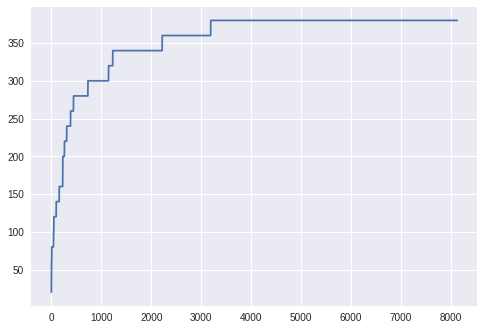

In [22]:
plt.plot(TS_regret)

# plot the figure

Text(0.5, 1.0, 'regret')

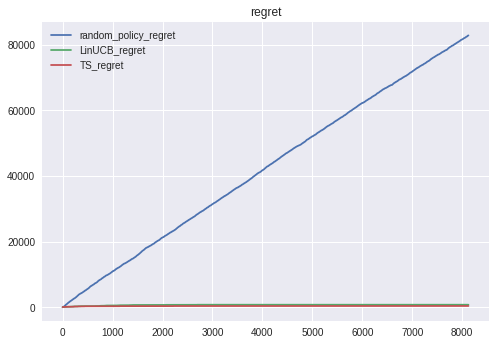

In [27]:
plt.plot(random_policy_regret, label='random_policy_regret')
plt.plot(LinUCB_regret, label='LinUCB_regret')
plt.plot(TS_regret,label='TS_regret')
plt.legend(loc='best')
plt.title('regret')


Text(0.5, 1.0, 'regret')

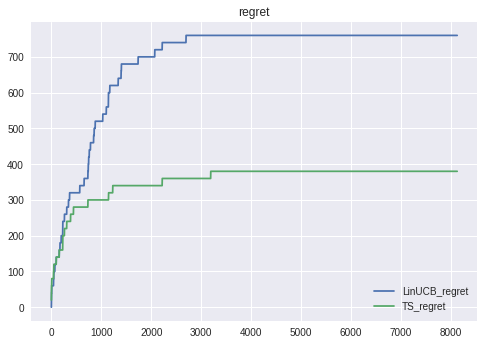

In [28]:
plt.plot(LinUCB_regret, label='LinUCB_regret')
plt.plot(TS_regret,label='TS_regret')
plt.legend(loc='best')
plt.title('regret')